# Pre-Processing Techniques

## Imports

In [1]:
# CONSTANT Variables
files = ['Data/Plasma/BLENNOWPLASMATAU_07Feb2024.csv', 'Data/Plasma/ADNI_BLENNOWPLASMANFL_10_03_18_27Nov2023.csv', 'Data/Plasma/UPENNPLASMA_27Nov2023.csv']

fields_needed = ['RID', 'VISCODE', 'PLASMA_NFL', 'PLASMATAU', 'AB42', 'AB40'] # Fields needed after the merge
# This is the AB value names that can be used
abvals = ['AB42', 'AB40']

display1 = ['PLASMA_NFL', 'PLASMATAU', 'AB4240'] # These should be the biomarker values
display2 = ['MMSE', 'PTEDUCAT', 'AGE'] # This should be the Non-Blood values, such as MMSE etc.

output_file_path = "File1/"

# Pre-Split Training and Testing (Ensure Dist. of classes)
# Take SMOTE Out
# ADD Other Biomarkers

In [2]:
#TODO: Deal with NULL values
%reload_ext autoreload
%autoreload 2
import pandas as pd
from PreProcessingPy import pp

## Read the Relevant Dataframes and Merge

In [3]:
# Read the dfs
preprocessor = pp(files, ['RID', 'VISCODE'], fields_needed)

# Create the AB42/AB40 value
preprocessor.create_ab4240(abvals)
preprocessor.df


,RID,VISCODE,PLASMA_NFL,PLASMATAU,AB4240
0,2,bl,28.2,2.41,0.331165
1,3,bl,188.3,3.84,0.220661
2,4,bl,31.2,3.76,0.311458
3,5,bl,36.3,3.81,0.189760
4,6,bl,52.5,2.86,0.153287
...,...,...,...,...,...
519,1402,bl,94.1,4.45,0.260446
520,1409,bl,46.4,3.54,0.231390
521,1414,bl,18.7,1.45,0.130205
522,1419,bl,25.8,1.56,0.194001


In [4]:
preprocessor.add_adni_merge_data(['RID', 'VISCODE', 'DX', 'PLASMA_NFL', 'PLASMATAU', 'AB4240', 'MMSE', 'PTEDUCAT', 'AGE', 'PTAU', 'TAU'])
preprocessor.df

d:\Git\NoMoreAlzheimersDisease\PreProcessingFiles\PreProcessingPy.py:56: DtypeWarning: Columns (20,105) have mixed types. Specify dtype option on import or set low_memory=False.
  am = pd.read_csv('Data/ADNIMERGE_15Jun2023.csv')


,RID,VISCODE,DX,PLASMA_NFL,PLASMATAU,AB4240,MMSE,PTEDUCAT,AGE,PTAU,TAU
0,2,bl,CN,28.2,2.41,0.331165,28.0,16,74.3,NaN,NaN
1,3,bl,Dementia,188.3,3.84,0.220661,20.0,18,81.3,22.83,239.7
2,4,bl,MCI,31.2,3.76,0.311458,27.0,10,67.5,13.29,153.1
3,5,bl,CN,36.3,3.81,0.189760,29.0,16,73.7,33.43,337
4,6,bl,MCI,52.5,2.86,0.153287,25.0,13,80.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
519,1402,bl,Dementia,94.1,4.45,0.260446,23.0,20,69.3,64.37,575
520,1409,bl,Dementia,46.4,3.54,0.231390,21.0,15,65.9,NaN,NaN
521,1414,bl,MCI,18.7,1.45,0.130205,27.0,18,74.3,18.62,213.7
522,1419,bl,MCI,25.8,1.56,0.194001,28.0,17,77.9,22.48,234.9


## Rename Fields

In [5]:
# Rename to be more intuitive for rest of detection
preprocessor.clean_data()
preprocessor.df

,RID,VISCODE,DX,PLASMA_NFL,PLASMATAU,AB4240,MMSE,PTEDUCAT,AGE,PTAU,TAU
1,3,bl,AD,188.3,3.84,0.220661,20.0,18,81.3,22.83,239.7
2,4,bl,MCI,31.2,3.76,0.311458,27.0,10,67.5,13.29,153.1
3,5,bl,SCD,36.3,3.81,0.189760,29.0,16,73.7,33.43,337
6,8,bl,SCD,163.6,2.75,0.196230,28.0,18,84.5,37.51,440.2
7,10,bl,AD,37.9,2.74,0.234788,24.0,12,73.9,31.26,329.9
...,...,...,...,...,...,...,...,...,...,...,...
518,1398,bl,MCI,47.1,3.27,0.271073,24.0,16,77.6,17.01,232.5
519,1402,bl,AD,94.1,4.45,0.260446,23.0,20,69.3,64.37,575
521,1414,bl,MCI,18.7,1.45,0.130205,27.0,18,74.3,18.62,213.7
522,1419,bl,MCI,25.8,1.56,0.194001,28.0,17,77.9,22.48,234.9


## Plot the data

[[36.3, 39.3, 23.6, 25.0, 9.0, 21.0, 35.2, 35.9, 17.5, 17.4, 10.7, 40.4, 62.6, 22.2, 18.9, 40.4, 19.0, 18.1, 19.3, 18.4, 29.7, 21.5, 25.4, 52.5, 60.6, 32.2, 24.6, 44.3, 38.1, 18.0, 26.2, 40.3, 15.2, 48.8, 20.1, 53.0, 22.7, 22.9, 34.2, 29.2, 21.7, 42.7, 25.0, 5.2, 24.0, 48.1, 20.4, 54.5, 40.5, 26.0, 16.3, 42.1, 24.3, 13.8, 18.3, 26.9, 17.8, 17.4, 15.9, 42.8, 31.3, 20.1, 54.6, 37.7, 25.1, 30.2, 31.0, 40.6, 29.2, 48.3, 24.3, 37.6, 31.5, 32.3, 43.5, 29.7, 27.0, 25.1, 31.8, 44.2, 23.9, 25.8, 21.6, 29.0, 26.1, 32.7, 29.1, 22.4, 23.8], [31.2, 36.7, 28.0, 36.1, 40.4, 35.2, 42.0, 24.6, 13.8, 43.7, 19.4, 66.0, 30.2, 19.6, 38.3, 55.6, 22.1, 54.3, 26.2, 51.8, 37.0, 35.9, 36.1, 14.6, 21.4, 48.1, 30.0, 56.1, 35.0, 72.0, 29.5, 37.0, 34.5, 28.6, 47.7, 11.1, 38.3, 30.4, 70.0, 8.9, 11.8, 42.6, 24.4, 38.5, 22.8, 32.1, 16.8, 48.9, 33.4, 56.8, 18.1, 35.8, 39.7, 50.6, 22.9, 61.3, 35.3, 15.6, 32.5, 44.3, 23.1, 75.0, 28.0, 23.5, 64.4, 43.5, 40.4, 36.9, 48.3, 46.5, 18.5, 48.0, 27.9, 24.5, 63.2, 33.1, 53.3, 51.

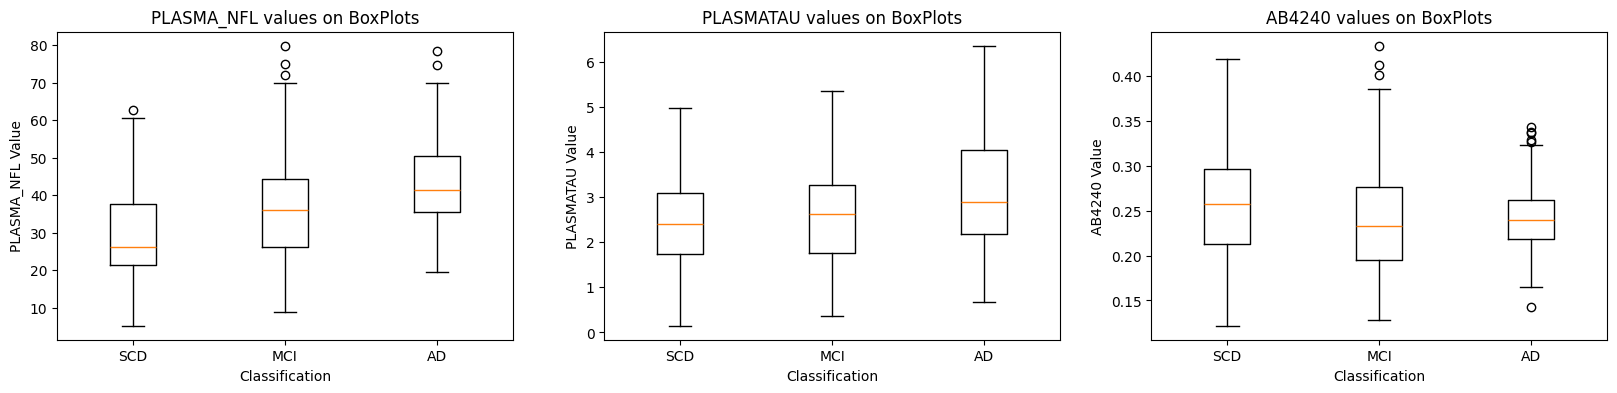

[[29.0, 29.0, 28.0, 29.0, 29.0, 26.0, 30.0, 29.0, 30.0, 28.0, 29.0, 29.0, 30.0, 27.0, 26.0, 30.0, 30.0, 30.0, 29.0, 30.0, 30.0, 30.0, 29.0, 30.0, 29.0, 27.0, 29.0, 30.0, 29.0, 30.0, 28.0, 30.0, 30.0, 29.0, 29.0, 30.0, 27.0, 29.0, 30.0, 30.0, 25.0, 27.0, 29.0, 30.0, 30.0, 30.0, 28.0, 28.0, 30.0, 30.0, 29.0, 30.0, 29.0, 29.0, 30.0, 29.0, 30.0, 28.0, 28.0, 30.0, 29.0, 30.0, 30.0, 27.0, 30.0, 28.0, 28.0, 29.0, 28.0, 28.0, 28.0, 30.0, 29.0, 28.0, 30.0, 29.0, 30.0, 28.0, 29.0, 30.0, 29.0, 29.0, 30.0, 30.0, 30.0, 30.0, 29.0, 28.0, 30.0], [27.0, 29.0, 25.0, 25.0, 29.0, 27.0, 27.0, 27.0, 28.0, 24.0, 30.0, 25.0, 29.0, 29.0, 27.0, 25.0, 27.0, 25.0, 29.0, 28.0, 28.0, 27.0, 28.0, 30.0, 28.0, 30.0, 24.0, 25.0, 26.0, 28.0, 28.0, 27.0, 24.0, 26.0, 28.0, 28.0, 25.0, 30.0, 27.0, 24.0, 29.0, 26.0, 29.0, 29.0, 25.0, 29.0, 28.0, 26.0, 26.0, 29.0, 29.0, 24.0, 30.0, 28.0, 25.0, 25.0, 26.0, 29.0, 25.0, 29.0, 29.0, 27.0, 30.0, 24.0, 25.0, 28.0, 30.0, 27.0, 28.0, 27.0, 26.0, 25.0, 28.0, 27.0, 26.0, 30.0, 26.0, 

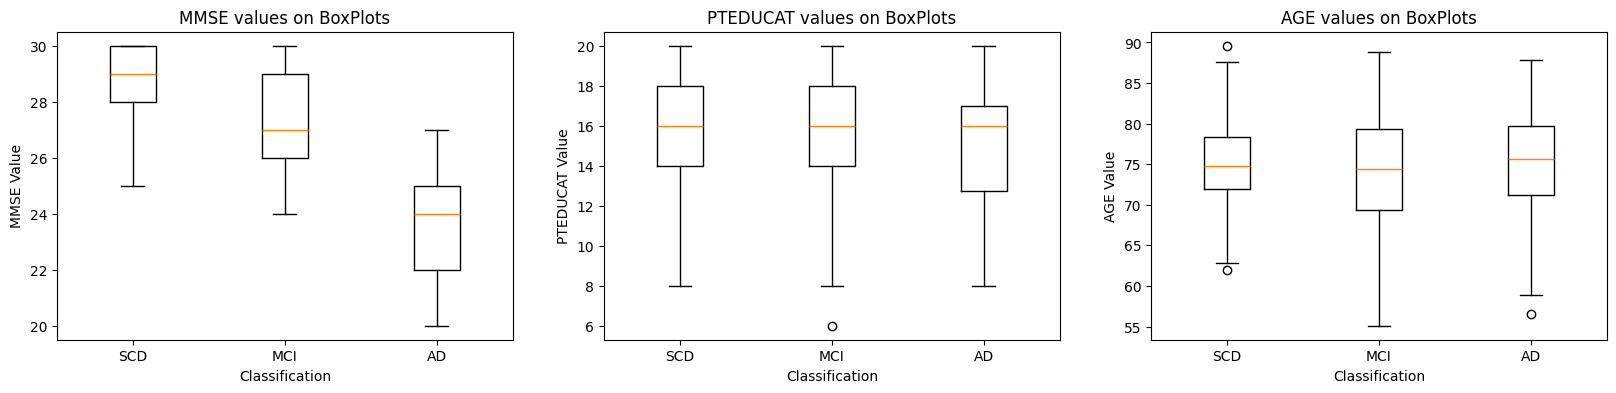

[[73.7, 78.5, 65.4, 73.1, 63.2, 71.7, 77.7, 76.2, 84.7, 69.6, 70.9, 77.0, 74.5, 74.0, 71.1, 79.6, 72.8, 73.2, 80.4, 72.0, 73.3, 77.9, 70.6, 73.2, 74.8, 80.4, 72.4, 78.0, 78.0, 70.6, 84.8, 82.8, 70.2, 77.0, 72.3, 76.3, 85.5, 72.7, 72.9, 73.5, 70.3, 87.6, 74.1, 77.7, 70.0, 81.0, 62.8, 77.0, 79.3, 77.0, 70.7, 75.6, 79.0, 74.8, 71.5, 77.7, 62.0, 70.8, 77.8, 89.6, 76.7, 76.0, 71.5, 70.9, 77.3, 72.4, 79.5, 74.0, 70.5, 80.0, 71.3, 83.1, 71.4, 86.1, 77.9, 84.3, 76.3, 75.8, 78.3, 87.2, 78.4, 72.0, 72.2, 76.5, 84.4, 83.3, 72.9, 73.2, 71.8], [67.5, 83.3, 76.8, 70.9, 85.9, 66.5, 77.3, 73.6, 60.7, 75.8, 70.6, 77.5, 82.3, 80.4, 86.1, 71.1, 65.1, 85.9, 60.3, 88.3, 68.0, 70.1, 67.1, 62.8, 65.6, 79.4, 76.4, 87.7, 79.2, 78.5, 72.1, 76.9, 76.1, 78.8, 70.5, 69.0, 71.2, 80.4, 84.0, 63.9, 61.3, 79.8, 61.6, 79.3, 62.7, 74.7, 63.0, 88.8, 85.5, 83.1, 56.1, 84.8, 77.9, 79.7, 55.2, 57.7, 80.7, 69.4, 74.3, 78.8, 65.4, 72.3, 78.0, 75.9, 83.2, 75.0, 72.1, 61.0, 78.2, 80.4, 70.1, 79.1, 80.9, 65.1, 82.8, 73.8, 79.6, 

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U5'), dtype('<U5')) -> None

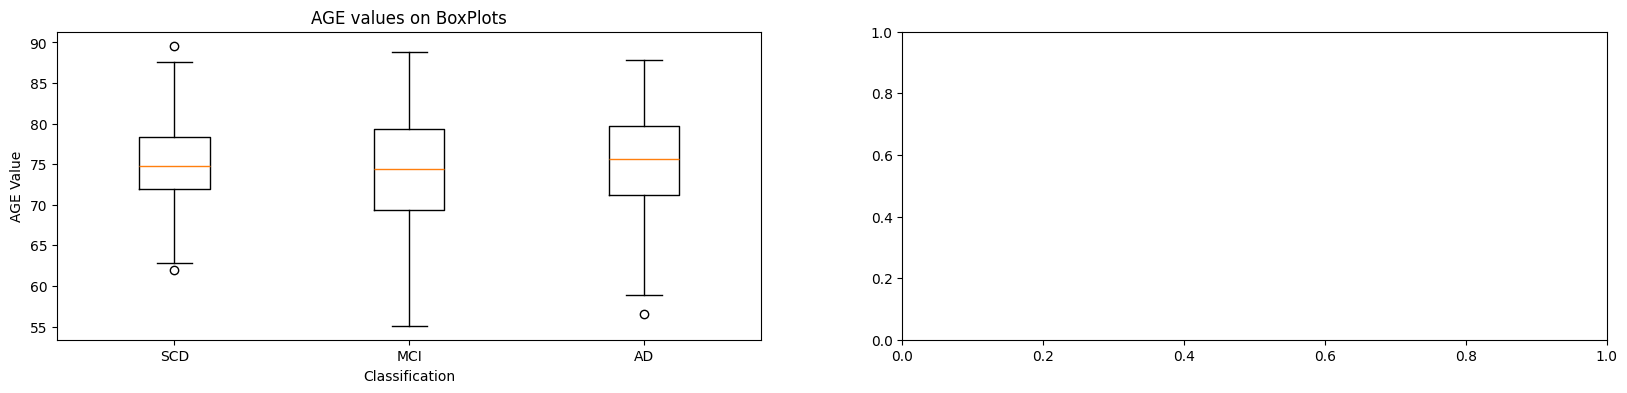

In [12]:
from PreProcessingPy import visual_display
vd = visual_display(preprocessor.df)

vd.display(display1)
vd.display(display2)
vd.display(['TAU', 'PTAU'])

In [90]:
# Write this to the Data file
preprocessor.write_to_csv(output_file_path + '/UnCleanData/data.csv')

## Identify Outliers

In [8]:
# SOURCE :: https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/#:~:text=Use%20Inter%2DQuartile%20Range%20(IQR,percentile%20of%20the%20dataset%2C%20respectively.

preprocessor.remove_outliers(display1)

[32, 101, 6, 198, 363, 77, 398, 210, 180, 53, 21, 118, 56, 286]


### Display the Filtered Data

[[36.3, 39.3, 23.6, 25.0, 9.0, 21.0, 35.2, 35.9, 17.5, 17.4, 10.7, 40.4, 62.6, 22.2, 18.9, 40.4, 19.0, 18.1, 19.3, 18.4, 29.7, 21.5, 25.4, 52.5, 60.6, 32.2, 24.6, 44.3, 38.1, 18.0, 26.2, 40.3, 15.2, 48.8, 20.1, 53.0, 22.7, 22.9, 34.2, 29.2, 21.7, 42.7, 25.0, 5.2, 24.0, 48.1, 20.4, 54.5, 40.5, 26.0, 16.3, 42.1, 24.3, 13.8, 18.3, 26.9, 17.8, 17.4, 15.9, 42.8, 31.3, 20.1, 54.6, 37.7, 25.1, 30.2, 31.0, 40.6, 29.2, 48.3, 24.3, 37.6, 31.5, 32.3, 43.5, 29.7, 27.0, 25.1, 31.8, 44.2, 23.9, 25.8, 21.6, 29.0, 26.1, 32.7, 29.1, 22.4, 23.8], [31.2, 36.7, 28.0, 36.1, 40.4, 35.2, 42.0, 24.6, 13.8, 43.7, 19.4, 66.0, 30.2, 19.6, 38.3, 55.6, 22.1, 54.3, 26.2, 51.8, 37.0, 35.9, 36.1, 14.6, 21.4, 48.1, 30.0, 56.1, 35.0, 72.0, 29.5, 37.0, 34.5, 28.6, 47.7, 11.1, 38.3, 30.4, 70.0, 8.9, 11.8, 42.6, 24.4, 38.5, 22.8, 32.1, 16.8, 48.9, 33.4, 56.8, 18.1, 35.8, 39.7, 50.6, 22.9, 61.3, 35.3, 15.6, 32.5, 44.3, 23.1, 75.0, 28.0, 23.5, 64.4, 43.5, 40.4, 36.9, 48.3, 46.5, 18.5, 48.0, 27.9, 24.5, 63.2, 33.1, 53.3, 51.

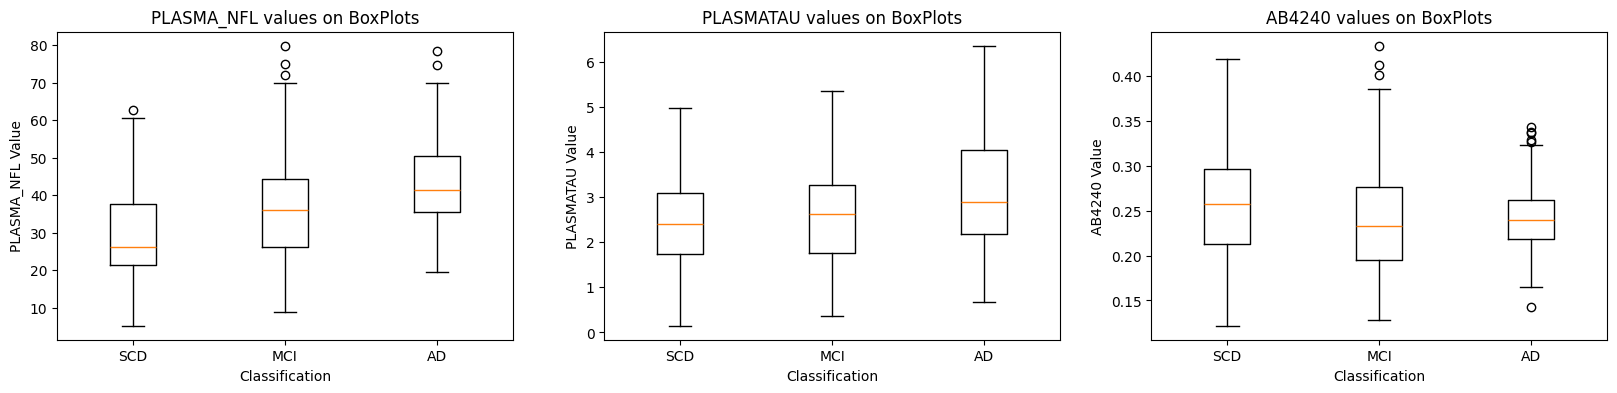

In [9]:
vd = visual_display(preprocessor.df)
vd.display(display1)

In [93]:
# Write this to a data file (with the outliers removed)
preprocessor.write_to_csv(output_file_path + 'CleanedData/data.csv')

## SMOTE Oversampling

In [94]:
preprocessor.use_SMOTE() # Needs to remove the RID, VISCODE Values (Shouldn't be needed)
preprocessor.df

,PLASMA_NFL,PLASMATAU,AB4240,MMSE,PTEDUCAT,AGE,DX
0,28.2,2.41,0.331165,28.0,16.0,74.3,SCD
1,36.3,3.81,0.18976,29.0,16.0,73.7,SCD
2,39.3,4.51,0.205351,29.0,12.0,78.5,SCD
3,23.6,4.57,0.398098,28.0,9.0,65.4,SCD
4,25.0,2.57,0.410816,29.0,18.0,73.1,SCD
...,...,...,...,...,...,...,...
460,30.048668,3.380268,0.257699,23.906669,17.720006,84.346666,AD
461,30.471131,2.66029,0.221768,26.026244,16.052489,72.957467,AD
462,23.956785,3.748795,0.188866,28.463988,13.268006,72.82881,SCD
463,51.340805,4.248619,0.276714,30.0,16.802683,81.906037,SCD


## Analysis of the SMOTE Data

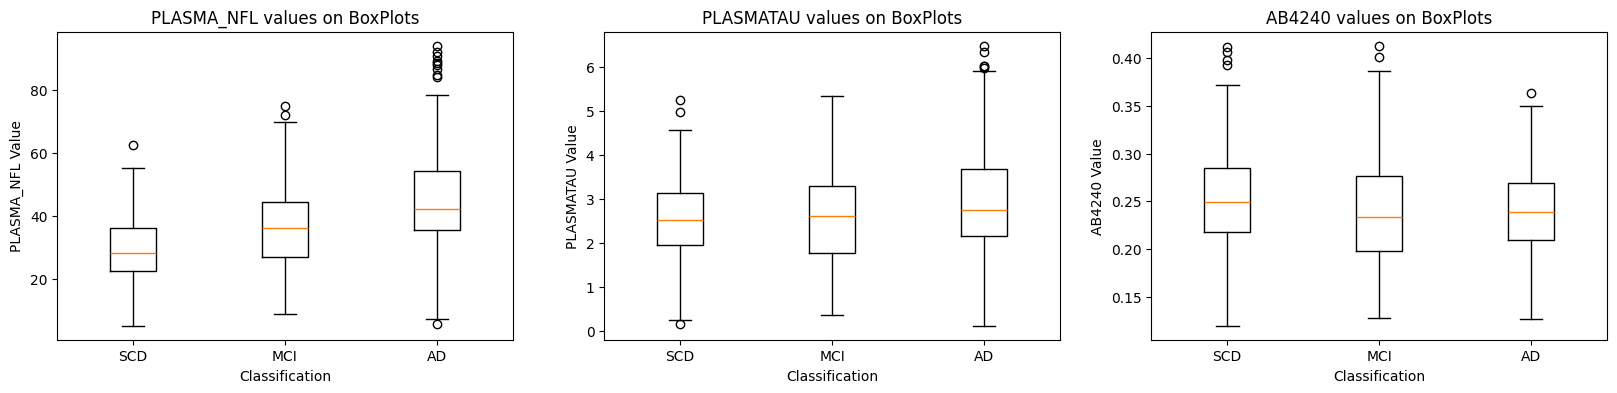

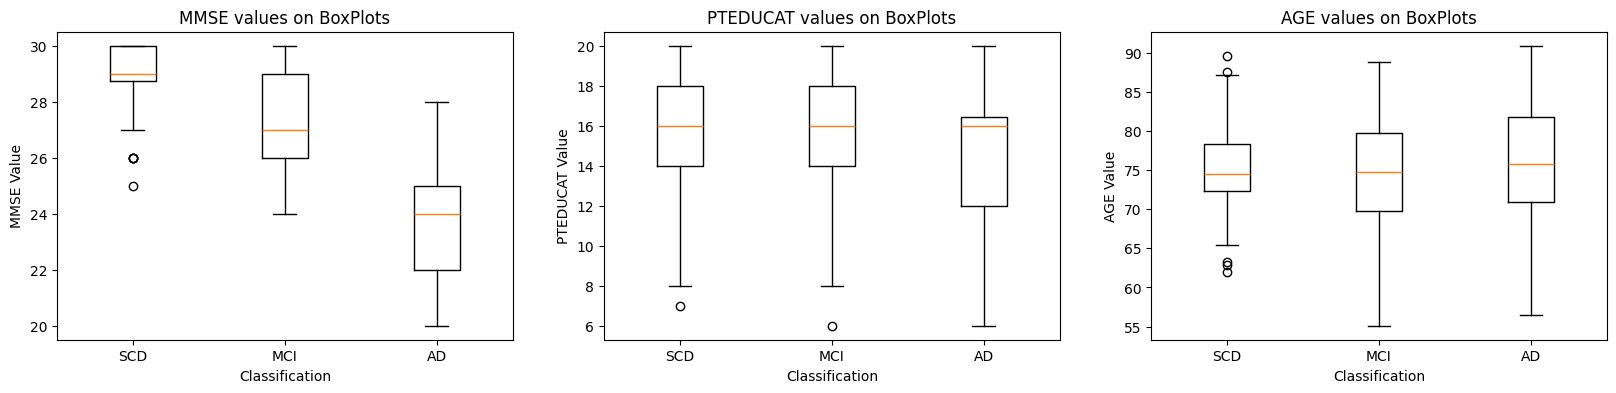

In [95]:
vd = visual_display(preprocessor.df)
vd.display(display1)
vd.display(display2)

In [96]:
preprocessor.write_to_csv(output_file_path + 'SMOTEData/data.csv')

## Effects of Pre-Processing in terms of Class Sizes

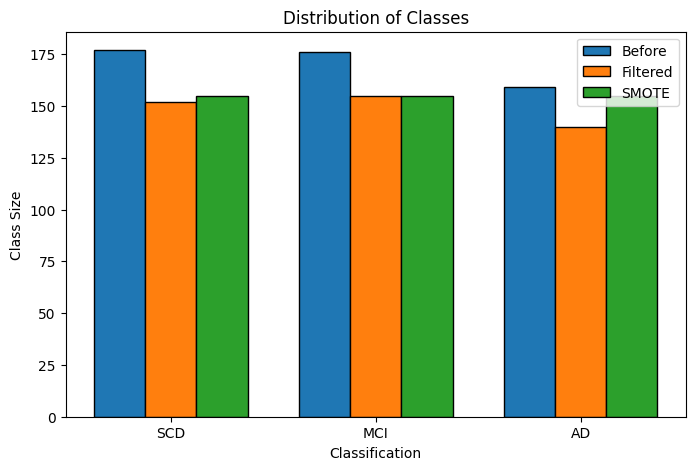

In [106]:
from PreProcessingPy import post_processing_display
# Compare Sizes of the data throughout processing
display = post_processing_display("File1")
display.display_results()